# Notebook d'exploration des données du projet de visualisation des glaciers

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import ftfy, chardet

In [9]:
# Chargement fichier .shp
global_shapefile = "glims_alpines2.shp"
gdf = gpd.read_file(global_shapefile)
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 65045 entries, 0 to 65044
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   line_type   65045 non-null  object  
 1   anlys_id    65045 non-null  float64 
 2   glac_id     65045 non-null  object  
 3   anlys_time  65045 non-null  object  
 4   area        65045 non-null  float64 
 5   db_area     65045 non-null  float64 
 6   width       65045 non-null  float64 
 7   length      65045 non-null  float64 
 8   primeclass  65045 non-null  float64 
 9   min_elev    65045 non-null  float64 
 10  mean_elev   65045 non-null  float64 
 11  max_elev    65045 non-null  float64 
 12  src_date    65045 non-null  object  
 13  rec_status  65045 non-null  object  
 14  glac_name   65045 non-null  object  
 15  wgms_id     65045 non-null  object  
 16  local_id    65045 non-null  object  
 17  glac_stat   65045 non-null  object  
 18  gone_date   65045 non-null  object  
 

In [10]:
# Sélection des lignes du geodataframe : relevés plus récents des lignes de glaciers
gdf_bounds = gdf[(gdf['line_type'] == 'glac_bound')]
recent_df_bounds = gdf_bounds.loc[gdf_bounds.groupby('glac_id')['src_date'].idxmax()].reset_index(drop=True)

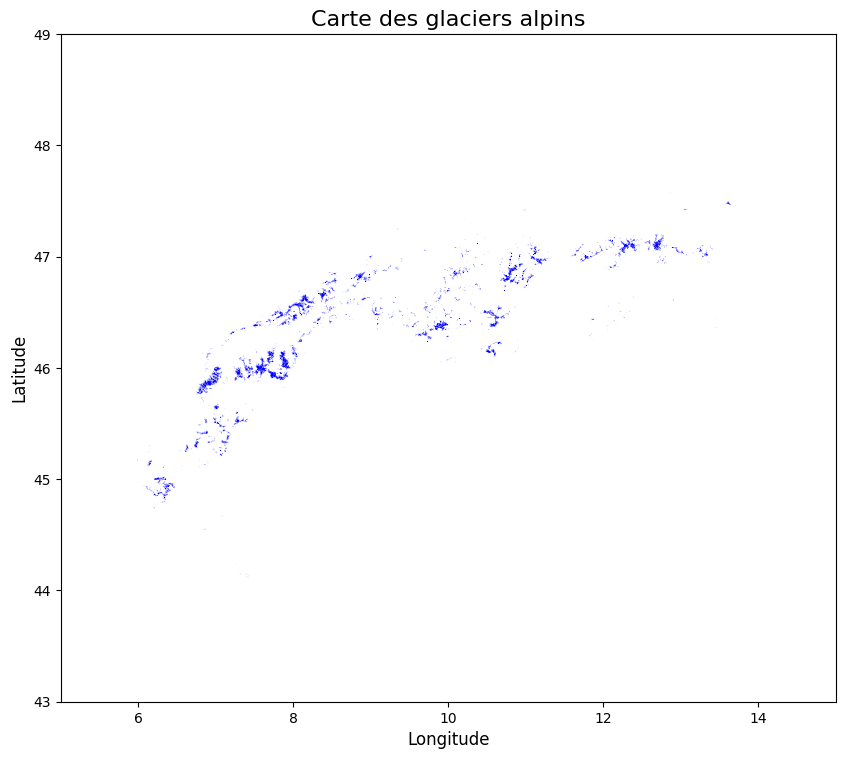

In [6]:
# Visualisation simple des glaciers

ax = recent_df_bounds.plot(figsize=(10, 10), color="blue") 
ax.set_xlim(5, 15)  
ax.set_ylim(43, 49)  

ax.set_title("Carte des glaciers alpins", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

plt.show()

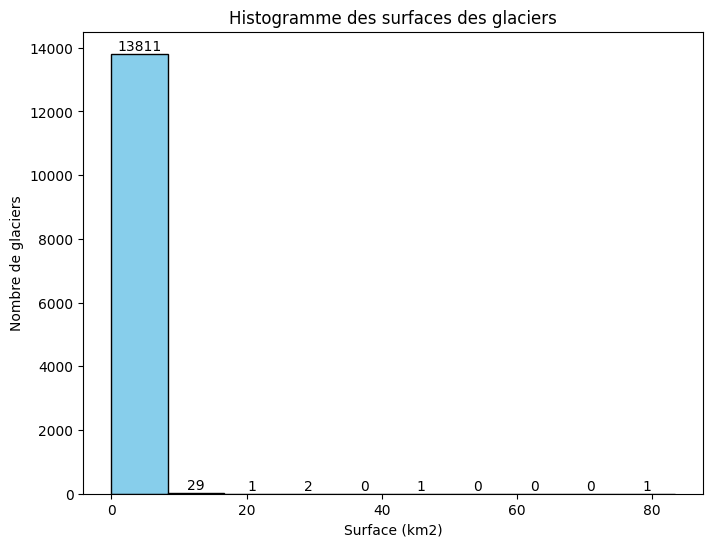

In [7]:
# Étude sur la tailles des glaciers

areas = recent_df_bounds["db_area"].tolist()

plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(areas, bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Surface (km2)")
plt.ylabel("Nombre de glaciers")
#plt.yscale('log')
plt.title("Histogramme des surfaces des glaciers")

for count, patch in zip(n, patches):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    plt.text(x, y, f"{int(count)}", ha='center', va='bottom')

plt.show()


In [8]:
# Étude du nombre de relevés des glaciers : 

compte_ids = gdf_bounds['glac_id'].value_counts().to_dict()
print(compte_ids)
print(list(compte_ids.values()))

{'G007964E46423N': 43, 'G013078E47425N': 38, 'G013046E47425N': 36, 'G013240E47068N': 31, 'G006263E44892N': 29, 'G011972E47060N': 27, 'G011090E46985N': 27, 'G006784E45784N': 27, 'G011053E47170N': 26, 'G006985E45951N': 24, 'G013004E47039N': 23, 'G012309E47147N': 23, 'G007457E45957N': 23, 'G012316E47119N': 23, 'G009697E46305N': 23, 'G007385E46017N': 23, 'G011155E46980N': 22, 'G010871E46773N': 22, 'G008010E46588N': 22, 'G007905E46481N': 22, 'G006129E45141N': 22, 'G010873E46909N': 22, 'G009695E47059N': 22, 'G008032E46504N': 21, 'G011080E47001N': 21, 'G012339E47101N': 21, 'G012266E47066N': 21, 'G011227E46975N': 21, 'G008187E46569N': 21, 'G011667E47065N': 21, 'G011021E46784N': 20, 'G013377E47095N': 20, 'G007871E46080N': 20, 'G013057E47424N': 20, 'G012377E47149N': 20, 'G012741E47104N': 20, 'G006934E45883N': 20, 'G009886E46384N': 20, 'G011117E46973N': 20, 'G006383E44906N': 20, 'G010947E46785N': 20, 'G011267E46983N': 20, 'G009264E46455N': 19, 'G007826E45990N': 19, 'G007865E46400N': 19, 'G012366E

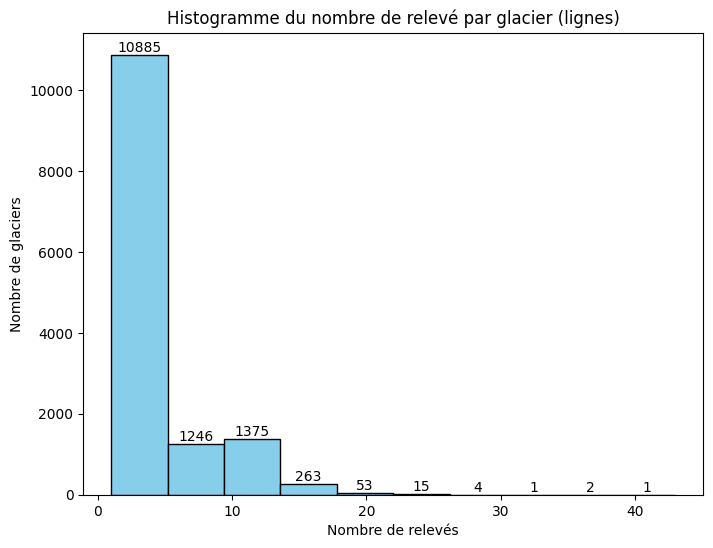

In [9]:
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(list(compte_ids.values()), bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Nombre de relevés")
plt.ylabel("Nombre de glaciers")
#plt.yscale('log')
plt.title("Histogramme du nombre de relevé par glacier (lignes)")

for count, patch in zip(n, patches):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    plt.text(x, y, f"{int(count)}", ha='center', va='bottom')

plt.show()

In [12]:
def normalisation_minmax(row, d):
    valeurs = d[row['glac_id']]
    min_val = min(valeurs)
    max_val = max(valeurs)
    if max_val == min_val:
        return 0.0
    return (row['db_area'] - min_val) / (max_val - min_val)

In [ ]:
# Étude de l'évolution de l'aire des glaciers : 

gdf_bounds_filtre = gdf_bounds[gdf_bounds['db_area'] <= 200].copy()

compte_ids_evo = gdf_bounds_filtre['glac_id'].value_counts()
glac_ids_multi = compte_ids_evo[compte_ids_evo > 1].index
gdf_bounds_evo = gdf_bounds_filtre[gdf_bounds_filtre['glac_id'].isin(glac_ids_multi)].copy()

dictionnaire = gdf_bounds_evo.groupby('glac_id')['db_area'].apply(list).to_dict()

gdf_bounds_evo['db_area_norm'] = gdf_bounds_evo.apply(lambda row: normalisation_minmax(row, dictionnaire), axis=1)

groupes_glaciers = gdf_bounds_evo.groupby('glac_id')

for glac_id, groupe in groupes_glaciers:
    groupe = groupe.sort_values('src_date')
    min_norm = groupe['db_area_norm'].min()
    max_norm = groupe['db_area_norm'].max()
    # print(f"Glacier {glac_id}: db_area_norm min = {min_norm}, max = {max_norm}")

Glacier G005930E45041N: db_area_norm min = 0.0, max = 1.0
Glacier G005936E45041N: db_area_norm min = 0.0, max = 1.0
Glacier G005937E44988N: db_area_norm min = 0.0, max = 1.0
Glacier G005940E45037N: db_area_norm min = 0.0, max = 1.0
Glacier G005941E45033N: db_area_norm min = 0.0, max = 1.0
Glacier G005943E45040N: db_area_norm min = 0.0, max = 1.0
Glacier G005956E45173N: db_area_norm min = 0.0, max = 1.0
Glacier G005985E45171N: db_area_norm min = 0.0, max = 1.0
Glacier G005990E45176N: db_area_norm min = 0.0, max = 1.0
Glacier G005994E45174N: db_area_norm min = 0.0, max = 1.0
Glacier G006028E44984N: db_area_norm min = 0.0, max = 1.0
Glacier G006033E44983N: db_area_norm min = 0.0, max = 1.0
Glacier G006072E44940N: db_area_norm min = 0.0, max = 1.0
Glacier G006079E44949N: db_area_norm min = 0.0, max = 1.0
Glacier G006080E44940N: db_area_norm min = 0.0, max = 1.0
Glacier G006080E44941N: db_area_norm min = 0.0, max = 1.0
Glacier G006084E44937N: db_area_norm min = 0.0, max = 1.0
Glacier G00610

[ -4.85   21.825  48.5    75.175 101.85 ]


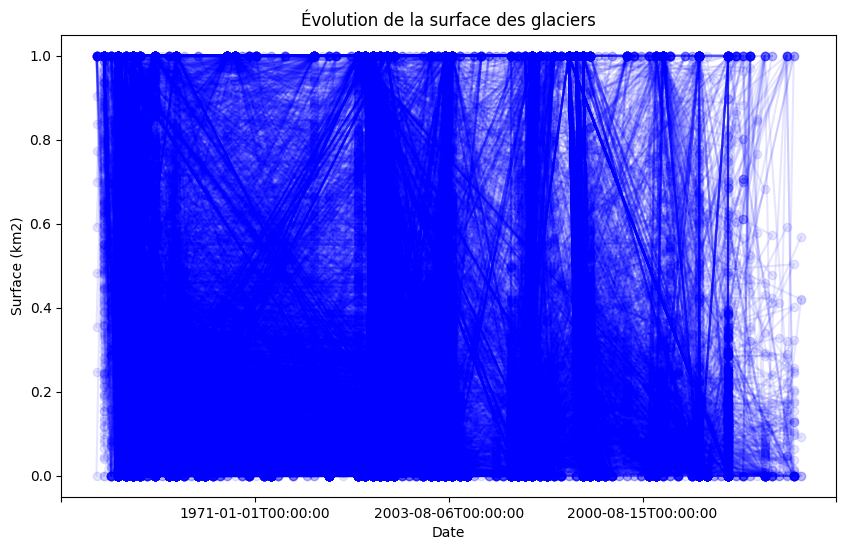

In [11]:
import numpy as np

plt.figure(figsize=(10, 6))

for glac_id, groupe in groupes_glaciers:
    groupe = groupe.sort_values('src_date')
    plt.plot(groupe['src_date'].to_numpy(), groupe['db_area_norm'].to_numpy(), 
             marker='o', label=f"Glacier {glac_id}",alpha = 0.1, color = 'blue')


plt.xlabel('Date')
plt.ylabel('Surface (km2)')
xmin, xmax = plt.xlim()  # récupère les limites actuelles de l'axe x
xticks = np.linspace(xmin, xmax, 5)
print(xticks)
plt.xticks(xticks)
plt.title("Évolution de la surface des glaciers")
plt.show()


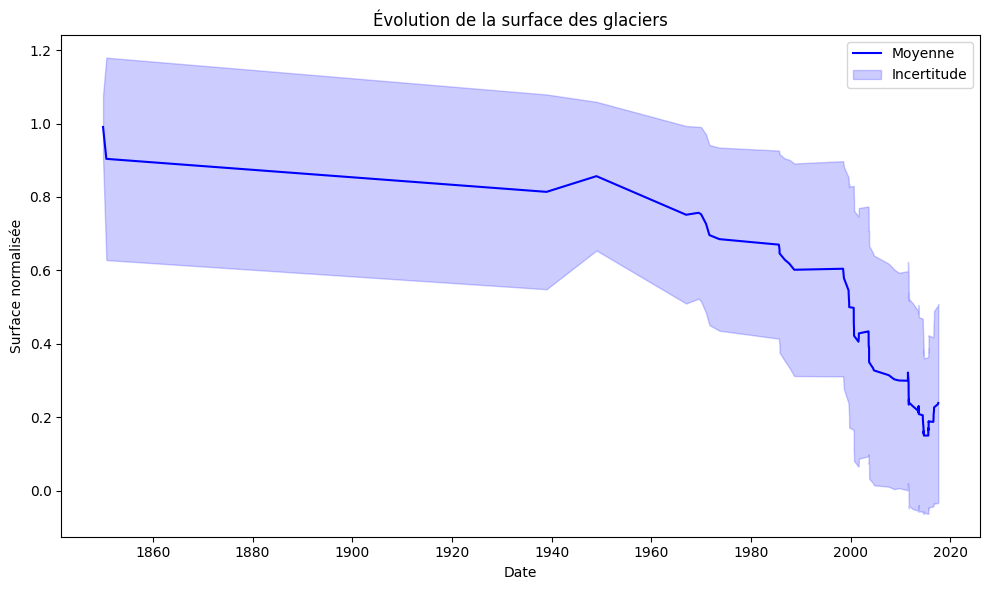

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

aggregated = gdf_bounds_evo.groupby('src_date')['db_area_norm'].agg(['mean','std']).reset_index()

aggregated['src_date'] = pd.to_datetime(aggregated['src_date'])
mask_post1995 = aggregated['src_date'] > pd.to_datetime("1960-12-31")

aggregated_post = aggregated.loc[mask_post1995].copy()
aggregated_post['mean_smoothed'] = aggregated_post['mean'].rolling(window=20, center=True, min_periods=1).mean()
aggregated_post['std_smoothed'] = aggregated_post['std'].rolling(window=20, center=True, min_periods=1).mean()

aggregated['mean_final'] = aggregated['mean']
aggregated['std_final'] = aggregated['std']

aggregated.loc[mask_post1995, 'mean_final'] = aggregated_post['mean_smoothed']
aggregated.loc[mask_post1995, 'std_final'] = aggregated_post['std_smoothed']

# Tracer la courbe complète
plt.figure(figsize=(10, 6))
plt.plot(aggregated['src_date'].to_numpy(), aggregated['mean_final'].to_numpy(), label='Moyenne', color='blue')

plt.fill_between(aggregated['src_date'].to_numpy(),
                 aggregated['mean_final'].to_numpy() - aggregated['std_final'].to_numpy(),
                 aggregated['mean_final'].to_numpy() + aggregated['std_final'].to_numpy(),
                 color='blue', alpha=0.2, label='Incertitude')

plt.xlabel('Date')
plt.ylabel('Surface normalisée')
plt.title("Évolution de la surface des glaciers")
plt.legend()
plt.tight_layout()
plt.show()


     src_date      mean       std  mean_final  std_final  date_num
0  1850-01-01  0.990600  0.085742    0.990600   0.085742         0
1  1850-09-01  0.903682  0.275778    0.903682   0.275778       243
2  1939-01-01  0.813784  0.265330    0.813784   0.265330     32506
3  1949-01-01  0.856557  0.202553    0.856557   0.202553     36159
4  1967-01-01  0.903330  0.217010    0.751382   0.241834     42733
..        ...       ...       ...         ...        ...       ...
93 2016-08-27  0.149839  0.230341    0.207030   0.245975     60869
94 2016-09-26  0.240980  0.298144    0.217960   0.252212     60899
95 2016-09-29  0.296215  0.319395    0.226428   0.262501     60902
96 2017-07-10  0.378697  0.338473    0.235305   0.269147     61186
97 2017-08-02  0.214328  0.245688    0.238514   0.270237     61209

[98 rows x 6 columns]
0         0
1       243
2     32506
3     36159
4     42733
      ...  
93    60869
94    60899
95    60902
96    61186
97    61209
Name: date_num, Length: 98, dtype: int64


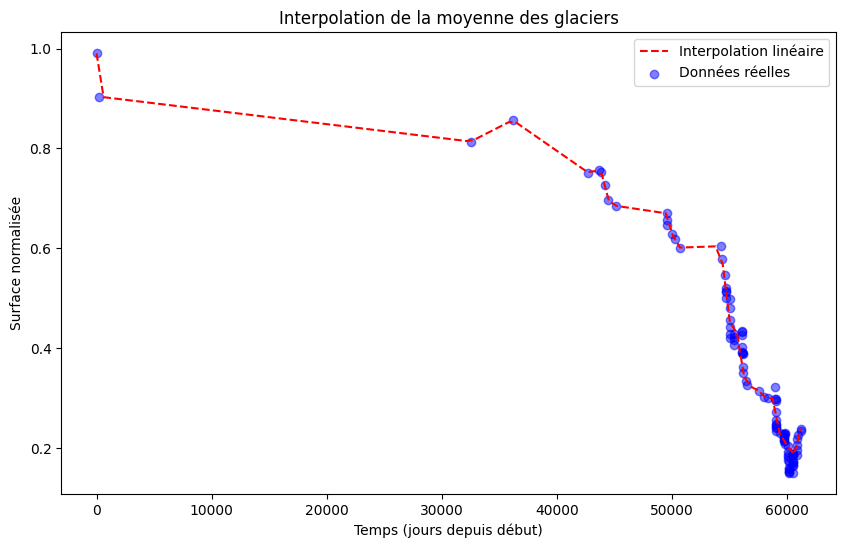

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline

print(aggregated)


# Charger et nettoyer les données
# Supprimer les doublons en gardant la première occurrence
aggregated = aggregated.drop_duplicates(subset=['src_date'])
# Trier les valeurs par ordre croissant (au cas où)
aggregated = aggregated.sort_values('src_date')

aggregated['src_date'] = pd.to_datetime(aggregated['src_date'])
aggregated = aggregated.dropna(subset=['mean_final'])  # Supprimer valeurs manquantes
aggregated['date_num'] = (aggregated['src_date'] - aggregated['src_date'].min()).dt.days  # Transformer les dates
print(aggregated['date_num'])

# ----------- 1. Interpolation linéaire -----------
linear_interp = interp1d(aggregated['date_num'], aggregated['mean_final'], kind='linear', fill_value="extrapolate")
test_dates = np.linspace(aggregated['date_num'].min(), aggregated['date_num'].max(), 100)
linear_values = linear_interp(test_dates)

# ----------- Affichage des interpolations -----------
plt.figure(figsize=(10, 6))
plt.scatter(aggregated['date_num'], aggregated['mean_final'], label="Données réelles", color="blue", alpha=0.5)
plt.plot(test_dates, linear_values, label="Interpolation linéaire", linestyle="dashed", color="red")

plt.xlabel("Temps (jours depuis début)")
plt.ylabel("Surface normalisée")
plt.title("Interpolation de la moyenne des glaciers")
plt.legend()
plt.show()

169


169it [34:41, 12.31s/it]

Interpolation et mise à l'échelle terminées !


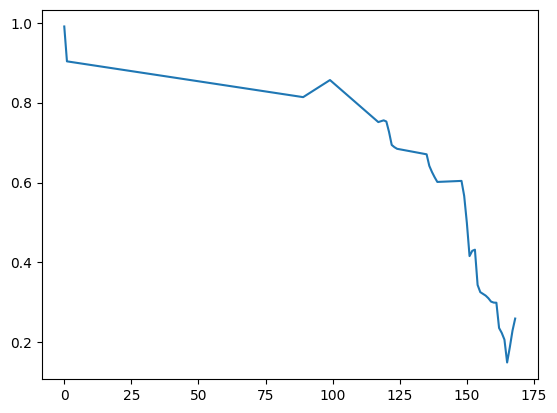

In [33]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.affinity import scale
from shapely.geometry import Polygon, MultiPolygon
import os
from tqdm import tqdm

filex = "filtered_glims_alpine_recents_f.geojson"
geodf = gpd.read_file(filex)


years = np.arange(1850, 2019)
#interpolated_surfaces = linear_interp(years)  # Interpoler les surfaces aux dates données

years_num = (pd.to_datetime(years, format='%Y') - aggregated['src_date'].min()).days
interpolated_surfaces = linear_interp(years_num)


initial_surface = linear_interp(aggregated['date_num'].min())
scaling_factors = interpolated_surfaces / initial_surface  # Facteurs d'échelle relatifs à la surface initiale


# Créer un dictionnaire pour stocker les GeoDataFrames par année
geodf_dict = {}

for year, scale_factor in tqdm(zip(years, scaling_factors)):
    # Appliquer la mise à l'échelle aux polygones
    geodf_scaled = geodf.copy()
    geodf_scaled["geometry"] = geodf_scaled["geometry"].apply(lambda geom: scale(geom, xfact=scale_factor, yfact=scale_factor, origin="centroid"))
    
    # Sauvegarder dans le dictionnaire
    geodf_dict[year] = geodf_scaled

    # Optionnel : Sauvegarde dans des fichiers individuels
    geodf_scaled.to_file(f"/Users/thibautdejean/Desktop/AlpineMelt/glacier_years0/glacier_{year}.geojson", driver='GeoJSON')

print("Interpolation et mise à l'échelle terminées !")


        line_type         glac_id                      glac_name   db_area  \
0      glac_bound  G005930E45041N    Glacier du Taillefer (Nord)  0.011485   
1      glac_bound  G005936E45041N           Glacier du Grand Van  0.003133   
2      glac_bound  G005936E45043N               Glacier sans nom  0.004947   
3      glac_bound  G005937E44988N         Glacier du Grand Armet  0.011485   
4      glac_bound  G005937E45042N               Glacier sans nom  0.001625   
...           ...             ...                            ...       ...   
13840  glac_bound  G013631E47479N               Glacier sans nom  0.008082   
13841  glac_bound  G013636E47464N  Glacier Edelgriess Gletscher,  0.046727   
13842  glac_bound  G013637E47463N               Glacier sans nom  0.038946   
13843  glac_bound  G013637E47464N               Glacier sans nom  0.035153   
13844  glac_bound  G013844E46378N             Glacier Triglav Gl  0.023075   

        src_date                                           geom

No handles with labels found to put in legend.


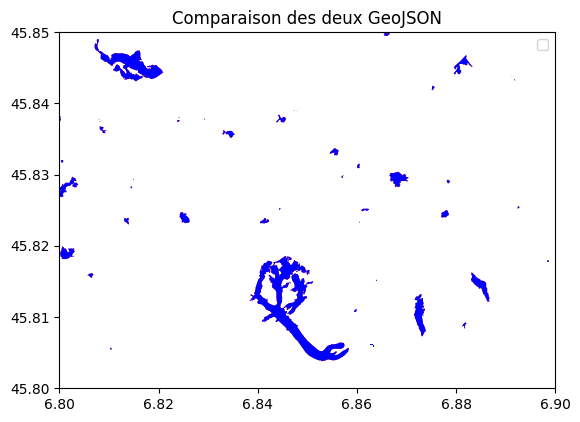

In [45]:
file0 = "/Users/thibautdejean/Desktop/AlpineMelt/glacier_years0/glacier_2012.geojson"
geodf0 = gpd.read_file(file0)
file1 = "/Users/thibautdejean/Desktop/AlpineMelt/glacier_years0/glacier_1850.geojson"
geodf1 = gpd.read_file(file0)

print(geodf1)

ax = geodf1.plot(color='red', alpha=1, label="Fichier 1850")
geodf0.plot(ax = ax, color='blue', alpha=1, label="Fichier 2012")

plt.legend()
plt.xlim(6.8, 6.9)
plt.ylim(45.80, 45.85)
plt.title("Comparaison des deux GeoJSON")
plt.show()


In [14]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.affinity import scale
from shapely.geometry import Polygon, MultiPolygon
import os

# 📌 Charger les données des glaciers
gdf_bounds_evo['src_date'] = pd.to_datetime(gdf_bounds_evo['src_date'])

# 📌 Supprimer les valeurs manquantes et transformer les dates en nombres
gdf_bounds_evo = gdf_bounds_evo.dropna(subset=['db_area_norm'])
gdf_bounds_evo['date_num'] = (gdf_bounds_evo['src_date'] - gdf_bounds_evo['src_date'].min()).dt.days

# 📌 Suppression des doublons et tri
gdf_bounds_evo = gdf_bounds_evo.drop_duplicates(subset=['date_num'])
gdf_bounds_evo = gdf_bounds_evo.sort_values('date_num')

# 📌 Créer l'interpolation de surface normalisée
from scipy.interpolate import interp1d

interpolated_surface = interp1d(
    gdf_bounds_evo['date_num'], gdf_bounds_evo['db_area_norm'], kind='linear', fill_value="extrapolate"
)

# 📌 Générer une liste d'années entre 1900 et 2025
years = np.arange(1900, 2026)
year_dates = pd.to_datetime([f"{year}-01-01" for year in years])
year_nums = (year_dates - gdf_bounds_evo['src_date'].min()).days

# 📌 Dossier de sortie des GeoJSON
output_dir = "glacier_years"
os.makedirs(output_dir, exist_ok=True)

# 📌 Générer un fichier GeoJSON par année
for year, year_num in zip(years, year_nums):
    gdf_year = gdf_bounds_evo.copy()

    # 🔹 Interpoler la surface pour cette année
    new_surface = interpolated_surface(year_num)

    # 🔹 Mettre à jour les Polygons avec correction des erreurs
    def safe_scale(row):
        if row['geometry'] is None or not row['geometry'].is_valid:
            print(f"⚠️ Géométrie invalide détectée pour {row['glac_id']} → conservée sans modification.")
            return row['geometry']

        try:
            scale_factor = np.sqrt(new_surface / row['db_area_norm'])

            # Appliquer la mise à l'échelle
            new_geom = scale(row['geometry'], scale_factor, scale_factor)

            # Vérifier et corriger les géométries invalides
            if isinstance(new_geom, Polygon):
                if not new_geom.is_valid:
                    new_geom = new_geom.buffer(0)  # Corrige les erreurs topologiques
                if not new_geom.exterior.is_closed:  # Vérifie si le contour est fermé
                    print(f"⚠️ Erreur sur {row['glac_id']}: LinearRing non fermé → géométrie ignorée.")
                    return row['geometry']
            elif isinstance(new_geom, MultiPolygon):
                new_geom = MultiPolygon([poly.buffer(0) if not poly.is_valid else poly for poly in new_geom.geoms])

            return new_geom

        except Exception as e:
            print(f"⚠️ Erreur critique sur {row['glac_id']}: {e} → géométrie ignorée.")
            return row['geometry']  # Garder l'ancienne géométrie en cas d'erreur

    gdf_year['geometry'] = gdf_year.apply(safe_scale, axis=1)

    # 🔹 Sauvegarder en GeoJSON
    filename = os.path.join(output_dir, f"glaciers_{year}.geojson")
    gdf_year.to_file(filename, driver="GeoJSON")
    print(f"✅ Fichier sauvegardé : {filename}")

print("🚀 Génération des fichiers GeoJSON terminée !")

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G006997E45863N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008466E46768N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012232E47135N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006818E45797N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010660E46875N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006885E46094N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G007758E46474N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G011

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

✅ Fichier sauvegardé : glacier_years/glaciers_1906.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide dét

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️ Géométrie invalide détectée pour G011087E46938N → conservée sans modification.
⚠️ Erreur critique sur G013033E47030N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012206E46505N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G010637E46406N → conser

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Géométrie invalide détectée pour G010637E46406N → conservée sans modification.
⚠️ Erreur critique sur G010010E46836N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006647E45275N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008692E46708N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G012678E47096N → conservée sans modification.
⚠️ Erreur critique sur G011832E46282N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006214E44856N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009732E46452N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G012232E47135N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006818E45797N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010660E46875N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006885E46094N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G007758E46474N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G011120E47095N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006318E44844N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G010438E46179N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G013448E46365N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
✅ Fichier sauvegardé : glacier_years/glaciers_1914.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G0

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

✅ Fichier sauvegardé : glacier_years/glaciers_1915.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide dét

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

✅ Fichier sauvegardé : glacier_years/glaciers_1916.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide dét

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️ Géométrie invalide détectée pour G011087E46938N → conservée sans modification.
⚠️ Erreur critique sur G013033E47030N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012206E46505N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G010637E46406N → conservée sans modification.
⚠️ Erreur critique sur G010010E46836N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006647E45275N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008692E46708N: IllegalArgumentExcep

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

✅ Fichier sauvegardé : glacier_years/glaciers_1918.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide dét

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️ Géométrie invalide détectée pour G011087E46938N → conservée sans modification.
⚠️ Erreur critique sur G013033E47030N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012206E46505N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G010637E46406N → conservée sans modification.
⚠️ Erreur critique sur G010010E46836N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006647E45275N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008692E46708N: IllegalArgumentExcep

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G008466E46768N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012232E47135N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006818E45797N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010660E46875N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006885E46094N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G007758E46474N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G011120E47095N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

✅ Fichier sauvegardé : glacier_years/glaciers_1922.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide dét

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

✅ Fichier sauvegardé : glacier_years/glaciers_1923.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide dét

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G012206E46505N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G010637E46406N → conservée sans modification.
⚠️ Erreur critique sur G010010E46836N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006647E45275N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008692E46708N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G012678E47096N → conservée sans modification.
⚠️ Erreur critique sur G011832E46282N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006214E44856N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G010660E46875N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006885E46094N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G007758E46474N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G011120E47095N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006318E44844N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010104E46587N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012179E46911N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

✅ Fichier sauvegardé : glacier_years/glaciers_1928.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide dét

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

✅ Fichier sauvegardé : glacier_years/glaciers_1929.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide dét

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G006647E45275N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008692E46708N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G012678E47096N → conservée sans modification.
⚠️ Erreur critique sur G011832E46282N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006214E44856N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009732E46452N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006997E45863N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008466E46768N: IllegalArgumentException: Points of LinearRin

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G010438E46179N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G013448E46365N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
✅ Fichier sauvegardé : glacier_years/glaciers_1934.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G0

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G011832E46282N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006214E44856N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009732E46452N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006997E45863N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008466E46768N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012232E47135N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006818E45797N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G011832E46282N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006214E44856N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009732E46452N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006997E45863N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008466E46768N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012232E47135N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006818E45797N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G010104E46587N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012179E46911N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010438E46179N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G013448E46365N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
✅ Fichier sauvegardé : glacier_years/glaciers_1937.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed 

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

✅ Fichier sauvegardé : glacier_years/glaciers_1941.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide dét

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

✅ Fichier sauvegardé : glacier_years/glaciers_1942.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide dét

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

✅ Fichier sauvegardé : glacier_years/glaciers_1943.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide dét

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G006647E45275N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008692E46708N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G012678E47096N → conservée sans modification.
⚠️ Erreur critique sur G011832E46282N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006214E44856N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009732E46452N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006997E45863N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008466E46768N: IllegalArgumentException: Points of LinearRin

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G006647E45275N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008692E46708N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G012678E47096N → conservée sans modification.
⚠️ Erreur critique sur G011832E46282N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006214E44856N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009732E46452N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006997E45863N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008466E46768N: IllegalArgumentException: Points of LinearRin

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G010438E46179N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G013448E46365N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
✅ Fichier sauvegardé : glacier_years/glaciers_1948.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G0

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G011832E46282N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006214E44856N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009732E46452N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006997E45863N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008466E46768N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012232E47135N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006818E45797N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G013448E46365N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
✅ Fichier sauvegardé : glacier_years/glaciers_1952.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G0

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Géométrie invalide détectée pour G010637E46406N → conservée sans modification.
⚠️ Erreur critique sur G010010E46836N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006647E45275N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008692E46708N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G012678E47096N → conservée sans modification.
⚠️ Erreur critique sur G011832E46282N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006214E44856N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009732E46452N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G006885E46094N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G007758E46474N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G011120E47095N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006318E44844N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010104E46587N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012179E46911N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010438E46179N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G013

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

✅ Fichier sauvegardé : glacier_years/glaciers_1956.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide dét

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G012206E46505N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G010637E46406N → conservée sans modification.
⚠️ Erreur critique sur G010010E46836N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006647E45275N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008692E46708N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G012678E47096N → conservée sans modification.
⚠️ Erreur critique sur G011832E46282N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006214E44856N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Géométrie invalide détectée pour G012678E47096N → conservée sans modification.
⚠️ Erreur critique sur G011832E46282N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006214E44856N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009732E46452N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006997E45863N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008466E46768N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012232E47135N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006818E45797N: IllegalArgumentException: Points of LinearRin

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

✅ Fichier sauvegardé : glacier_years/glaciers_1960.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide dét

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G006647E45275N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008692E46708N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G012678E47096N → conservée sans modification.
⚠️ Erreur critique sur G011832E46282N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006214E44856N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009732E46452N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006997E45863N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008466E46768N: IllegalArgumentException: Points of LinearRin

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

✅ Fichier sauvegardé : glacier_years/glaciers_1963.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide dét

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G008692E46708N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G012678E47096N → conservée sans modification.
⚠️ Erreur critique sur G011832E46282N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006214E44856N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009732E46452N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006997E45863N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008466E46768N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012232E47135N: IllegalArgumentException: Points of LinearRin

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G006647E45275N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008692E46708N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G012678E47096N → conservée sans modification.
⚠️ Erreur critique sur G011832E46282N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006214E44856N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009732E46452N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006997E45863N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008466E46768N: IllegalArgumentException: Points of LinearRin

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G013448E46365N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
✅ Fichier sauvegardé : glacier_years/glaciers_1968.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G0

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G008692E46708N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G012678E47096N → conservée sans modification.
⚠️ Erreur critique sur G011832E46282N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006214E44856N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009732E46452N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006997E45863N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008466E46768N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012232E47135N: IllegalArgumentException: Points of LinearRin

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

✅ Fichier sauvegardé : glacier_years/glaciers_1973.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide dét

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G006647E45275N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008692E46708N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G012678E47096N → conservée sans modification.
⚠️ Erreur critique sur G011832E46282N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006214E44856N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009732E46452N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006997E45863N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008466E46768N: IllegalArgumentException: Points of LinearRin

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

✅ Fichier sauvegardé : glacier_years/glaciers_1976.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide dét

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️ Géométrie invalide détectée pour G011087E46938N → conservée sans modification.
⚠️ Erreur critique sur G013033E47030N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012206E46505N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G010637E46406N → conservée sans modification.
⚠️ Erreur critique sur G010010E46836N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006647E45275N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008692E46708N: IllegalArgumentExcep

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G011832E46282N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006214E44856N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009732E46452N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006997E45863N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008466E46768N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012232E47135N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006818E45797N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️ Géométrie invalide détectée pour G011087E46938N → conservée sans modification.
⚠️ Erreur critique sur G013033E47030N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012206E46505N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G010637E46406N → conser

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G009732E46452N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006997E45863N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008466E46768N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012232E47135N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006818E45797N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010660E46875N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006885E46094N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G007

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Géométrie invalide détectée pour G011087E46938N → conservée sans modification.
⚠️ Erreur critique sur G013033E47030N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012206E46505N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G010637E46406N → conservée sans modification.
⚠️ Erreur critique sur G010010E46836N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006647E45275N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008692E46708N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G012678E47096N → conservée sans modification.
⚠️ Erreur critique sur G011832E46282N: IllegalArgumentExcep

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

✅ Fichier sauvegardé : glacier_years/glaciers_1983.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide dét

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

✅ Fichier sauvegardé : glacier_years/glaciers_1984.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide dét

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Géométrie invalide détectée pour G011087E46938N → conservée sans modification.
⚠️ Erreur critique sur G013033E47030N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012206E46505N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G010637E46406N → conservée sans modification.
⚠️ Erreur critique sur G010010E46836N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006647E45275N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008692E46708N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G012678E47096N → conservée sans modification.
⚠️ Erreur critique sur G011832E46282N: IllegalArgumentExcep

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G006318E44844N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010104E46587N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012179E46911N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010438E46179N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G013448E46365N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
✅ Fichier sauvegardé : glacier_years/glaciers_1989.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed 

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

✅ Fichier sauvegardé : glacier_years/glaciers_1990.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide dét

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️ Géométrie invalide détectée pour G011087E46938N → conservée sans modification.
⚠️ Erreur critique sur G013033E47030N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012206E46505N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G010637E46406N → conser

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Géométrie invalide détectée pour G010637E46406N → conservée sans modification.
⚠️ Erreur critique sur G010010E46836N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006647E45275N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008692E46708N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G012678E47096N → conservée sans modification.
⚠️ Erreur critique sur G011832E46282N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006214E44856N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009732E46452N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

✅ Fichier sauvegardé : glacier_years/glaciers_1993.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide dét

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G008692E46708N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G012678E47096N → conservée sans modification.
⚠️ Erreur critique sur G011832E46282N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006214E44856N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009732E46452N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006997E45863N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008466E46768N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012232E47135N: IllegalArgumentException: Points of LinearRin

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G008692E46708N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G012678E47096N → conservée sans modification.
⚠️ Erreur critique sur G011832E46282N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006214E44856N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009732E46452N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006997E45863N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008466E46768N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012232E47135N: IllegalArgumentException: Points of LinearRin

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G008692E46708N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G012678E47096N → conservée sans modification.
⚠️ Erreur critique sur G011832E46282N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006214E44856N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009732E46452N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006997E45863N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008466E46768N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012232E47135N: IllegalArgumentException: Points of LinearRin

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G008692E46708N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G012678E47096N → conservée sans modification.
⚠️ Erreur critique sur G011832E46282N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006214E44856N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009732E46452N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006997E45863N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008466E46768N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012232E47135N: IllegalArgumentException: Points of LinearRin

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️ Géométrie invalide détectée pour G011087E46938N → conservée sans modification.
⚠️ Erreur critique sur G013033E47030N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012206E46505N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G010637E46406N → conservée sans modification.
⚠️ Erreur critique sur G010010E46836N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006647E45275N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008692E46708N: IllegalArgumentExcep

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G006318E44844N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010104E46587N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012179E46911N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010438E46179N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G013448E46365N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
✅ Fichier sauvegardé : glacier_years/glaciers_2007.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed 

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G008692E46708N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G012678E47096N → conservée sans modification.
⚠️ Erreur critique sur G011832E46282N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006214E44856N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009732E46452N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006997E45863N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008466E46768N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G012232E47135N: IllegalArgumentException: Points of LinearRin

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G012179E46911N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010438E46179N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G013448E46365N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
✅ Fichier sauvegardé : glacier_years/glaciers_2012.geojson
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed 

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])


⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/shapely/affinity.py:72: RuntimeWarning: invalid value encountered in add
  return np.matmul(A, coords.T).T + off
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/Users/thibautdejean/Library/Python/3.9/l

⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006226E44847N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006977E45894N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G008475E46523N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G008864E46804N → conservée sans modification.
⚠️ Erreur critique sur G009795E46356N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G010855E46798N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Géométrie invalide détectée pour G011100E46976N → conservée sans modification.
⚠️

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb5379

⚠️ Erreur critique sur G010972E47168N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006994E45896N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006823E45859N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006352E44818N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009695E47059N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006986E45634N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb5379

⚠️ Erreur critique sur G010972E47168N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006994E45896N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006823E45859N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006352E44818N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009695E47059N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006986E45634N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb5379

⚠️ Erreur critique sur G010972E47168N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006994E45896N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006823E45859N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006352E44818N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009695E47059N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006986E45634N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb5379

⚠️ Erreur critique sur G010972E47168N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006994E45896N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006823E45859N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006352E44818N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009695E47059N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006986E45634N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb5379

⚠️ Erreur critique sur G010972E47168N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006994E45896N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006823E45859N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006352E44818N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009695E47059N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006986E45634N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb5379

⚠️ Erreur critique sur G010972E47168N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006994E45896N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006823E45859N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006352E44818N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009695E47059N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006986E45634N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb5379

⚠️ Erreur critique sur G010972E47168N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006994E45896N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006823E45859N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006352E44818N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009695E47059N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006986E45634N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_63294/3660106362.py:49: RuntimeWarning: invalid value encountered in sqrt
  scale_factor = np.sqrt(new_surface / row['db_area_norm'])
/var/folders/l_/4km91tb5379

⚠️ Erreur critique sur G010972E47168N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009986E46479N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006994E45896N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006823E45859N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006352E44818N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G009695E47059N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006986E45634N: IllegalArgumentException: Points of LinearRing do not form a closed linestring → géométrie ignorée.
⚠️ Erreur critique sur G006

In [12]:
import pandas as pd

# 1. Préparation des données pour chaque glacier
# S'assurer que la colonne 'src_date' est de type datetime
gdf_bounds_evo['src_date'] = pd.to_datetime(gdf_bounds_evo['src_date'])

# Générer un dictionnaire pour chaque glacier : clé = glac_id, valeur = liste de paires {date, db_area}
dico_glaciers = {}

# On parcourt chaque groupe (chaque glacier)
for glacier, group in gdf_bounds_evo.groupby('glac_id'):
    # Tri par date
    group = group.sort_values('src_date')
    # Création d'une liste de dictionnaires pour chaque relevé
    releves = group.apply(
        lambda row: {
            "date": row["src_date"].strftime("%Y-%m-%d"),
            "db_area": row["db_area"]
        },
        axis=1
    ).tolist()
    dico_glaciers[glacier] = releves

# 2. Création de la ligne "global" à partir des données agrégées
# Supposons que "aggregated" contient au moins 'src_date' et 'mean_final'
aggregated['src_date'] = pd.to_datetime(aggregated['src_date'])
global_data = aggregated[['src_date', 'mean_final']].copy()
# On renomme 'mean_final' en 'db_area' pour homogénéiser
global_data = global_data.rename(columns={'mean_final': 'db_area'})
# Formater la date en chaîne de caractères
global_data['src_date'] = global_data['src_date'].dt.strftime("%Y-%m-%d")
# Convertir en liste de dictionnaires
global_list = global_data.to_dict(orient='records')

# Ajouter la ligne globale au dictionnaire avec la clé "global"
dico_glaciers["global"] = global_list

# Affichage du dictionnaire (ou export vers JSON
import json

with open("glaciers_areas.json", "w") as f:
    json.dump(dico_glaciers, f, indent=4)

In [19]:
import pandas as pd
import json

# 1. Préparation des données pour chaque glacier
# S'assurer que la colonne 'src_date' est de type datetime
gdf_bounds_evo['src_date'] = pd.to_datetime(gdf_bounds_evo['src_date'])

# Ajouter une colonne pour l'année et le mois
gdf_bounds_evo['year_month'] = gdf_bounds_evo['src_date'].dt.to_period('M')

# Filtrer les valeurs inférieures à 0.001
gdf_bounds_evo = gdf_bounds_evo[gdf_bounds_evo['db_area'] >= 0.001]

# Générer un dictionnaire pour chaque glacier : clé = glac_id, valeur = liste de paires {date, db_area}
dico_glaciers = {}

# On parcourt chaque groupe (chaque glacier)
for glacier, group in gdf_bounds_evo.groupby('glac_id'):
    # Sélectionner la valeur minimale de db_area par mois
    group = group.loc[group.groupby('year_month')['db_area'].idxmax()]
    
    # Tri par date
    group = group.sort_values('src_date')

    # Création d'une liste de dictionnaires pour chaque relevé
    releves = group.apply(
        lambda row: {
            "date": row["src_date"].strftime("%Y-%m-%d"),
            "db_area": row["db_area"]
        },
        axis=1
    ).tolist()

    dico_glaciers[glacier] = releves

# 2. Création de la ligne "global" à partir des données agrégées
# Supposons que "aggregated" contient au moins 'src_date' et 'mean_final'
aggregated['src_date'] = pd.to_datetime(aggregated['src_date'])
aggregated['year_month'] = aggregated['src_date'].dt.to_period('M')

# Filtrer les valeurs inférieures à 0.001
aggregated = aggregated[aggregated['mean_final'] >= 0.001]

# Sélectionner la valeur minimale par mois
global_data = aggregated.loc[aggregated.groupby('year_month')['mean_final'].idxmax(), ['src_date', 'mean_final']]

# On renomme 'mean_final' en 'db_area' pour homogénéiser
global_data = global_data.rename(columns={'mean_final': 'db_area'})

# Formater la date en chaîne de caractères
global_data['src_date'] = global_data['src_date'].dt.strftime("%Y-%m-%d")

# Convertir en liste de dictionnaires
global_list = global_data.to_dict(orient='records')

# Ajouter la ligne globale au dictionnaire avec la clé "global"
dico_glaciers["global"] = global_list

# Export vers JSON
with open("glaciers_areas_f2.json", "w") as f:
    json.dump(dico_glaciers, f, indent=4)

print("Export terminé : glaciers_areas_f2.json")

Export terminé : glaciers_areas_f2.json


/Users/thibautdejean/Library/Python/3.9/lib/python/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


IndexError: single positional indexer is out-of-bounds

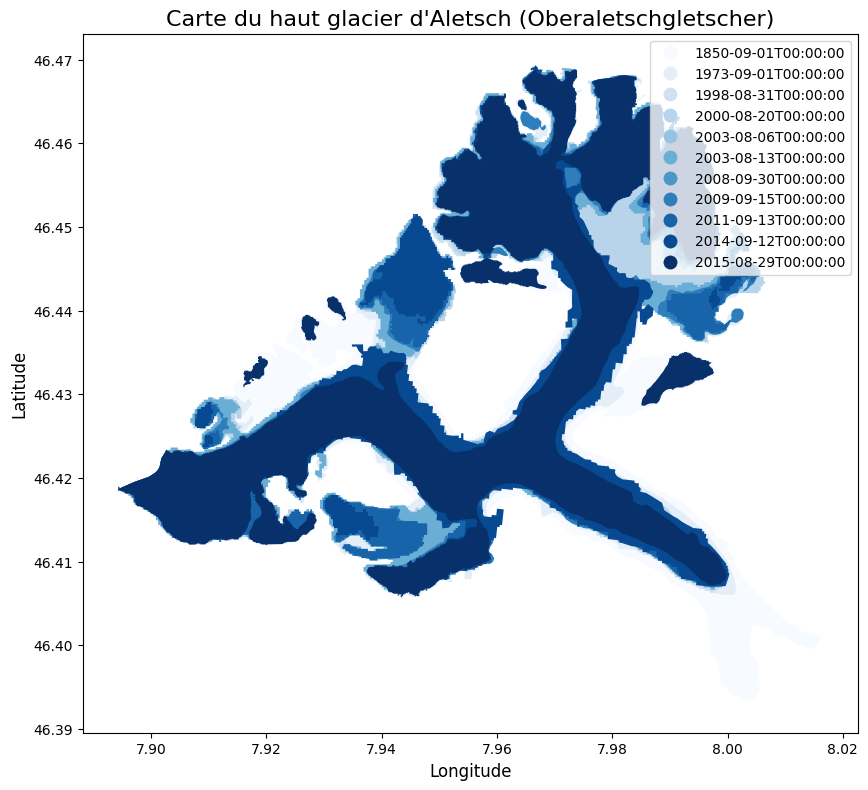

In [14]:
# Évolution d'un glacier : 

gdf_bounds_unq = gdf_bounds[gdf_bounds['glac_id']=='G007964E46423N']
gdf_bounds_unq = gdf_bounds_unq.sort_values('src_date')

ax = gdf_bounds_unq.plot(
    figsize=(10, 10),
    column='src_date',
    cmap='Blues',
    legend=True
)

ax.set_title("Carte du haut glacier d'Aletsch (Oberaletschgletscher)", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

plt.show()

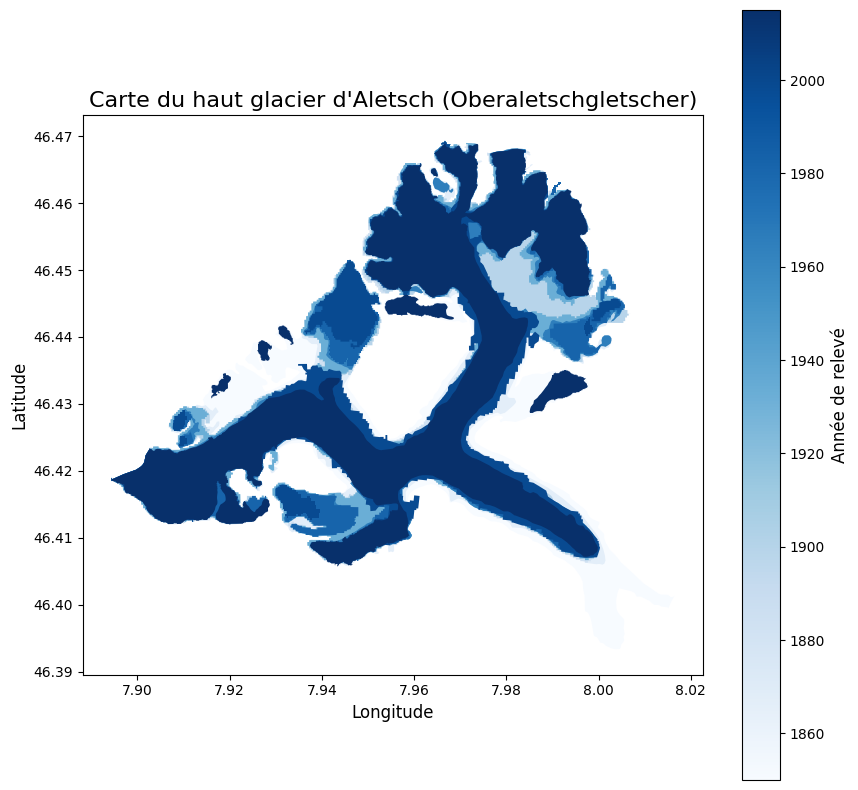

In [94]:
gdf_bounds_unq = gdf_bounds[gdf_bounds['glac_id'] == 'G007964E46423N'].copy()
gdf_bounds_unq = gdf_bounds_unq.sort_values('src_date')


vmin = gdf_bounds_unq['src_date'].min()
vmax = gdf_bounds_unq['src_date'].max()

norm = plt.Normalize(vmin=int(vmin[:4]), vmax=int(vmax[:4]))
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)
sm._A = []  

ax = gdf_bounds_unq.plot(
    figsize=(10, 10),
    column='src_date',
    cmap='Blues',
    legend=False  
)

cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Année de relevé", fontsize=12)

ax.set_title("Carte du haut glacier d'Aletsch (Oberaletschgletscher)", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

plt.show()
